In this notebook we will be using the smtd_preprocessing.py file which is a preprocessing pileline for twitter data to pre-process our tweets and then train our own twitter embeddings. <br>
We can find pre-trained twitter embedding 


In [ ]:
!wget https://raw.githubusercontent.com/practical-nlp/practical-nlp-code/master/Ch8/O5_smtd_preprocessing.py -O "smtd_preprocessing.py"
!wget https://raw.githubusercontent.com/practical-nlp/practical-nlp-code/master/Ch8/Data/sts_gold_tweet.csv -O "sts_gold_tweet.csv"
!pip3 install demoji

--2021-11-07 10:01:06--  https://raw.githubusercontent.com/practical-nlp/practical-nlp-code/master/Ch8/O5_smtd_preprocessing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17420 (17K) [text/plain]
Saving to: ‘smtd_preprocessing.py’

smtd_preprocessing. 100%[===================>]  17.01K  --.-KB/s    in 0.001s  

2021-11-07 10:01:06 (24.7 MB/s) - ‘smtd_preprocessing.py’ saved [17420/17420]

--2021-11-07 10:01:06--  https://raw.githubusercontent.com/practical-nlp/practical-nlp-code/master/Ch8/Data/sts_gold_tweet.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, 

In [ ]:
import os
import sys
import pandas as pd
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

PATH = "" #path to repo
preprocessing_path = PATH+"/smtd_preprocessing.py"
sys.path.append(os.path.abspath(preprocessing_path))
import smtd_preprocessing #special function file


Let's use the dir() function to find all the properties and methods in the package.

In [ ]:
dir(smtd_preprocessing)

['Entity',
 'Punct',
 'PunctChars',
 'TweetTokenizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'deEmojify',
 'demoji',
 'identify_AlphaNumerics',
 'identify_Savings',
 'indentify_Money',
 'indentify_Offers',
 'indentify_Promos',
 'indentify_freebies',
 'neg_lookahead',
 'optional',
 'pos_lookahead',
 'printable',
 'process_BrandMentions',
 'process_BrandName',
 'process_Dates',
 'process_EmailIds',
 'process_HashTags',
 'process_Mentions',
 'process_NonBrandMentions',
 'process_Times',
 'process_TweetText',
 'process_URLs',
 'process_Websites',
 'prune_multple_consecutive_same_char',
 're',
 'regex_or',
 'remove_emoji',
 'remove_spl_words',
 'replace_numbers',
 'string',
 'strip_unicode',
 'strip_whiteSpaces',
 'to_LowerCase',
 'trim']

## Read Data
Let's read the data. Normally in csv files the values are separated by a ','.<br> In this case, it is separated by a ';' so we will specify the delimiter as ';'.

In [ ]:
datapath = "sts_gold_tweet.csv"
df = pd.read_csv(datapath,error_bad_lines=False,delimiter=";")

In [ ]:
#let's have a loof at the dataset
df.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [ ]:
#pre-process tweets using our package 
df['tweet'] = df['tweet'].apply(lambda x: smtd_preprocessing.process_TweetText(x))
df['tweet'] = df['tweet'].apply(lambda x: tweet_tokenizer.tokenize(x))
tweets = df['tweet'].values

In [ ]:
tweets

array([list(['the', 'angel', 'is', 'going', 'to', 'miss', 'the', 'athlete', 'this', 'weekend']),
       list(['it', 'looks', 'as', 'though', 'shaq', 'is', 'getting', 'traded', 'to', 'cleveland', 'to', 'play', 'w', '/', 'lebron', '..', 'too', 'bad', 'for', 'suns', "'", 'fans', '.', 'the', 'big', 'cactus', 'is', 'no', 'more']),
       list(['constantnonbrandmention', 'constantdate', "isn't", 'coming', 'soon', 'enough']),
       ...,
       list(['constantnonbrandmention', 'lol', 'only', 'a', 'psp', ',', 'had', 'a', 'game', 'boy', 'but', 'my', 'cousin', 'lost', 'it', 'and', 'theres', 'a', 'constantalphanum', 'around']),
       list(['good', 'morning', 'everyone', '!', 'it', 'is', 'such', 'a', 'beautiful', 'day', 'here', 'in', 'new', 'england', '!']),
       list(['hey', 'guess', 'was', 'constantnonbrandmention', 'the', 'lakers', 'won', 'and', 'kobe', 'is', 'mvp', 'just', 'thought', 'i', 'would', 'tell', 'ya', 'haha'])],
      dtype=object)

## Train Embeddings
Let's train our own embeddings.

In [ ]:
#CBOW
import time
start = time.time()
word2vec_tweet = Word2Vec(tweets,min_count=5, sg=0)
end = time.time()

print("CBOW Model Training Complete.\nTime taken for training is:{:.5f} sec ".format((end-start)))

CBOW Model Training Complete.
Time taken for training is:0.34445 sec 


In [ ]:
#Summarize the loaded model
print("Summary of the model:",word2vec_tweet)

#Summarize vocabulary
words = list(word2vec_tweet.wv.vocab)
print("Small part of Vocabulary of our model:",words[:10])

#Acess vector for one word
print("Acess Vector for the word 'lol'",word2vec_tweet['lol'])

Summary of the model: Word2Vec(vocab=774, size=100, alpha=0.025)
Small part of Vocabulary of our model: ['the', 'is', 'going', 'to', 'miss', 'this', 'weekend', 'it', 'looks', 'as']
Acess Vector for the word 'lol' [ 0.26261118 -0.00305881  0.04802508 -0.00113373 -0.22184816  0.3966788
  0.12545452 -0.1035515   0.09358642  0.17369477  0.7700864  -0.02277104
 -0.18696041  0.0475458  -0.03156232  0.3324909   0.03585568 -0.18085495
  0.12998846 -0.20418671 -0.05478672 -0.60303605 -0.26682922  0.20163324
 -0.29300305  0.16652262 -0.1317875   0.11951951  0.12531601  0.14786327
  0.11724941  0.00762997 -0.14808586  0.0644353  -0.1716985   0.00746393
 -0.3058101   0.49184266  0.23369212  0.42324167  0.02008196 -0.04666354
 -0.03909602  0.01946854 -0.11119857  0.00729648 -0.05179984  0.37201273
  0.03498581  0.01490475 -0.01851728  0.18683088 -0.28357288 -0.2990038
  0.2738006   0.243131    0.00431447  0.09134115  0.13725089  0.40705287
  0.0169875  -0.3730263   0.1963871   0.12174623  0.0878365

In [ ]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE

In [ ]:
#Preprocessing our models vocabulary to make better visualizations
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words_vocab= list(word2vec_tweet.wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words('english')
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Size of Vocabulary: 774
Few words in Vocabulary ['the', 'is', 'going', 'to', 'miss', 'this', 'weekend', 'it', 'looks', 'as', 'though', 'getting', 'play', 'w', '/', 'lebron', '..', 'too', 'bad', 'for', "'", 'fans', '.', 'big', 'no', 'more', 'constantnonbrandmention', 'constantdate', "isn't", 'coming', 'soon', 'enough', 'drinking', 'a', 'mcdonalds', 'coffee', 'and', 'not', 'why', 'someone', 'would', 'me', 'so', 'taylor', 'swift', 'doesnt', 'have', 'twitter', 'i', 'was']
Size of Vocabulary without stopwords: 654
Few words in Vocabulary without stopwords ['going', 'miss', 'weekend', 'looks', 'though', 'getting', 'play', 'w', '/', 'lebron', '..', 'bad', "'", 'fans', '.', 'big', 'constantnonbrandmention', 'constantdate', 'coming', 'soon', 'enough', 'drinking', 'mcdonalds', 'coffee', 'someone', 'would', 'taylor', 'swift', 'doesnt', 'twitter']


In [ ]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['weekend','twitter','mcdonalds','coffee']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec_tweet.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(word2vec_tweet[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [ ]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [ 0.35188383 -0.00197503  0.06671146 -0.00483506 -0.30294967  0.5442977
  0.17390937 -0.14840776  0.13048649  0.23929778  1.0492479  -0.02786601
 -0.25767133  0.0695193  -0.0450411   0.44632274  0.04650595 -0.24098784
  0.17196093 -0.2813436  -0.07226726 -0.8195571  -0.36571366  0.27594274
 -0.4051893   0.23289227 -0.18185636  0.16636057  0.16907395  0.20347273
  0.16130488  0.015471   -0.19524975  0.08733428 -0.23300503  0.012804
 -0.4174267   0.67419696  0.32267267  0.5803395   0.03850038 -0.06754138
 -0.05805884  0.01964137 -0.14791667  0.0089194  -0.06929484  0.52006394
  0.04759541  0.02553115 -0.01810072  0.2546636  -0.39083824 -0.4150839
  0.3705443   0.33517146  0.01480071  0.12447322  0.18481144  0.5579287
  0.03205622 -0.5095978   0.27048165  0.15754579  0.11682545 -0.52039444
  0.14462534  0.15349707  0.15930593 -0.0452129  -0.06947631  0.1672517
 -0.07880168  0.2531749  -0.03029581 -0.01061701 -0.19537719 -0.31302196
  0.05732299 -0.27408946  0.66755307 

In [ ]:
word_clusters

[['now',
  'here',
  'so',
  'been',
  'need',
  'just',
  'but',
  'really',
  'starbucks',
  'he'],
 ['was', 'my', 'your', 'with', 'me', 'they', 'of', 'it', ',', 'constantoffer'],
 ['constantnum', 'now', 'at', '..', 'get', 'not', 'to', 'in', 'her', 'for'],
 ['not', 'the', 'an', 'me', 'if', 'obama', 'he', 'it', 'from', 'had']]

## Visualization
We will visualize our embeddings using T-SNE. If you do not know what T-SNE is or have forgotten please refer to Ch3 in the book. We will be using the T-SNE code previously introduced in a notebook from Ch3 which can be found [here](https://github.com/practical-nlp/practical-nlp/blob/master/Ch3/09_Visualizing_Embeddings_Using_TSNE.ipynb).

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

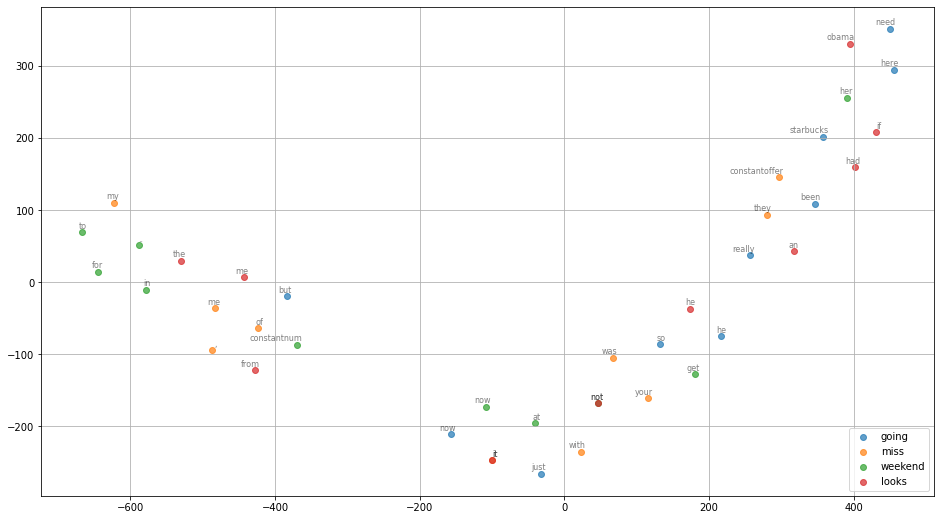

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)